<font color="orange"><h1><b>ISAT 449 – Emerging Topics in Applied Data Science</b></h1></font>

<font color="lightblue"><h2><b>Honda Identifier Model</b></h2></font>

<font color="green"><h3><b>Authors: Aiden Michael & KIROLOS BOULES</b></h3></font>

---






## <font color="red"><b>Project Summary</b></font>


This project aims to develop a Convolutional Neural Network (CNN) model capable of classifying different Honda car models from images.

The model is designed for multi-class classification, distinguishing between Honda vehicles such as the Civic, Odyssey, CR-V, Element, and Ridgeline based on visual features. Our dataset includes images taken in varied environments, lighting conditions, and angles to help the model generalize to real-world scenarios.

By leveraging deep learning, the system learns patterns and characteristics unique to each model, creating a reliable computer vision tool for accurately identifying Honda vehicles in practical applications.




### <font color="red"><b>THE DATASET</b></font>


This project uses a custom Honda vehicle image dataset containing five classes: civic, cr-v, element, odyssey, and ridgeline. The dataset is structured into three standard machine-learning splits—train, validation, and test—with a total of 2,125 images. The training set contains 1,262 images (civic: 221, cr-v: 178, element: 391, odyssey: 260, ridgeline: 212), the validation set includes 645 images (civic: 112, cr-v: 138, element: 135, odyssey: 135, ridgeline: 125), and the test set contains 218 images (civic: 45, cr-v: 43, element: 45, odyssey: 41, ridgeline: 44).

All class folders are consistently named in lowercase, ensuring clean and accurate label mapping when loading the dataset with Keras. Images appear in multiple real-world formats (JPG, PNG, WEBP, AVIF) and include diverse viewpoints, angles, and lighting conditions, giving the model strong exposure to natural variability. Overall, this dataset is well-balanced, well-organized, and ideal for training a Convolutional Neural Network for multi-class Honda vehicle classification.



## <font color="red"><b>Loading in the Data</b></font>


In [7]:
import os

# 1) Point to your data folder (relative to the notebook)
DATA_ROOT = os.path.join(os.getcwd(), "data_honda")
print("📂 DATA_ROOT:", DATA_ROOT)

# 2) Quick peek at folder structure
for root, dirs, files in os.walk(DATA_ROOT):
    level = root.replace(DATA_ROOT, "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")

    # Show only the first level of subfolders for cleanliness
    if level == 0:
        for d in dirs:
            print("    └──", d)
        break


📂 DATA_ROOT: C:\Users\ajm17\449 Final Honda\data_honda
data_honda/
    └── .ipynb_checkpoints
    └── test
    └── train
    └── val


## <font color="red"><b>Image Format Conversion (WEBP to JPG)</b></font>


In this step, we prepare the dataset by converting all <code>.webp</code> images into the more commonly used <code>.jpg</code> format. The line <code>import os</code> allows Python to interact with the file system so we can walk through all folders and files inside our dataset. Using the Pillow library, the script opens each WEBP image, converts it to RGB, saves it as a JPEG file with the same name, and then deletes the original WEBP file. This ensures that all images are in a consistent format (JPG), which avoids compatibility issues during model training and keeps the dataset clean and organized.



In [9]:
import os
from PIL import Image

# ✅ Root folder with train/val/test (relative to your notebook)
root = os.path.join(os.getcwd(), "data_honda")

converted_count = 0
skipped_count = 0

if not os.path.exists(root):
    raise FileNotFoundError(f"Root folder not found: {root}")

for subdir, dirs, files in os.walk(root):
    for file in files:
        filepath = os.path.join(subdir, file)
        lower = filepath.lower()

        if lower.endswith(".webp"):
            jpg_path = os.path.splitext(filepath)[0] + ".jpg"

            try:
                # Open WEBP and convert to RGB for JPEG
                with Image.open(filepath) as im:
                    im = im.convert("RGB")
                    im.save(jpg_path, "JPEG", quality=95)

                os.remove(filepath)
                converted_count += 1

            except Exception as e:
                print("❌ Failed to convert:", filepath, "Error:", e)
                skipped_count += 1

print("✅ Conversion complete!")
print("Converted:", converted_count, "| Skipped:", skipped_count)


✅ Conversion complete!
Converted: 0 | Skipped: 0


## <font color="red"><b>Loading the Dataset into TensorFlow</b></font>


This code loads the cleaned and organized Honda vehicle image dataset into TensorFlow so it can be used for training, validating, and testing the Convolutional Neural Network. It begins by defining the image size and batch size, followed by setting the correct dataset root directory inside Google Colab. The script prints the folder names inside the dataset to verify that the <code>train</code>, <code>val</code>, and <code>test</code> folders are present and accessible.

Next, TensorFlow’s <code>image_dataset_from_directory</code> function is used to load the images from each split. The training dataset is shuffled to improve generalization, while the validation and test datasets are loaded without shuffling to preserve order during evaluation. The class names are automatically detected based on subfolder names, ensuring consistent labeling across all three data splits.

Finally, the code applies caching and prefetching using <code>AUTOTUNE</code> to optimize performance during training. This helps the GPU stay busy by loading images in the background, reducing bottlenecks and speeding up the training process. Once completed, the script prints a confirmation that the dataset has been successfully loaded and prepared.



In [11]:
import tensorflow as tf
from tensorflow import keras
import os

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# ✅ Correct root folder for local Jupyter
DATA_ROOT = os.path.join(os.getcwd(), "data_honda")
# If you ever want to hard-code it instead, you could do:
# DATA_ROOT = r"C:\Users\ajm17\449 Final Honda\data_honda"

# --------------------------
# Quick folder check
# --------------------------
print("📁 Checking folders inside DATA_ROOT...")
print(DATA_ROOT)
print(os.listdir(DATA_ROOT))   # Should show: ['train', 'val', 'test']

# --------------------------
# Load TRAIN dataset
# --------------------------
train_ds = keras.utils.image_dataset_from_directory(
    os.path.join(DATA_ROOT, "train"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

# --------------------------
# Load VALIDATION dataset
# --------------------------
val_ds = keras.utils.image_dataset_from_directory(
    os.path.join(DATA_ROOT, "val"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# --------------------------
# Load TEST dataset
# --------------------------
test_ds = keras.utils.image_dataset_from_directory(
    os.path.join(DATA_ROOT, "test"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# --------------------------
# Class names
# --------------------------
class_names = train_ds.class_names
NUM_CLASSES = len(class_names)

print("\nClasses found:", class_names)
print("Total classes:", NUM_CLASSES)

# --------------------------
# Prefetch pipeline
# --------------------------
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)

print("\n✅ DATA LOADING COMPLETE!")


📁 Checking folders inside DATA_ROOT...
C:\Users\ajm17\449 Final Honda\data_honda
['.ipynb_checkpoints', 'test', 'train', 'val']
Found 1152 files belonging to 5 classes.
Found 645 files belonging to 5 classes.
Found 212 files belonging to 5 classes.

Classes found: ['civic', 'cr-v', 'element', 'odyssey', 'ridgeline']
Total classes: 5

✅ DATA LOADING COMPLETE!



### Dataset Cleanup & Image Format Standardization

Before training our Honda vehicle classification model, we must ensure that every image in the dataset is stored in a format compatible with TensorFlow. Some downloaded images were saved as .webp, .avif, or other unsupported formats, which can cause TensorFlow to throw decoding errors during loading or augmentation.

To solve this, the first code block scans every file in the dataset and:

Converts unsupported formats to high-quality .jpg images (whenever possible)

Removes unreadable or corrupted files

Ensures that only TensorFlow-safe formats remain (.jpg, .jpeg, .png, .bmp, .gif)

Once the cleanup is complete, the second code block reloads the dataset using image_dataset_from_directory(). This verifies that the cleaned dataset now loads without errors and correctly maps all five vehicle classes—civic, cr-v, element, odyssey, and ridgeline.

Performing this cleanup step is essential before applying data augmentation or building the CNN model, because TensorFlow must be able to read every image in the training, validation, and test sets.





In [14]:
import os
from PIL import Image

# ✅ Root folder with train/val/test in your local notebook directory
root = os.path.join(os.getcwd(), "data_honda")

# TensorFlow-friendly formats
valid_exts = [".jpg", ".jpeg", ".png", ".bmp", ".gif"]

converted = 0
removed = 0

for subdir, dirs, files in os.walk(root):
    for file in files:
        fpath = os.path.join(subdir, file)
        ext = os.path.splitext(file)[1].lower()

        # If extension is not one of the valid ones, try to convert
        if ext not in valid_exts:
            try:
                with Image.open(fpath) as im:
                    im = im.convert("RGB")
                    new_path = os.path.splitext(fpath)[0] + ".jpg"
                    im.save(new_path, "JPEG", quality=95)
                os.remove(fpath)
                converted += 1
                print("✅ Converted:", fpath, "->", new_path)
            except Exception as e:
                print("🗑️ Removing unreadable file:", fpath, "Error:", e)
                os.remove(fpath)
                removed += 1

print("\nCleanup complete!")
print("Converted:", converted, "| Removed:", removed)



Cleanup complete!
Converted: 0 | Removed: 0


In [18]:
import tensorflow as tf
from tensorflow import keras
import os

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# ✅ Use local folder instead of /content
DATA_ROOT = os.path.join(os.getcwd(), "data_honda")
# Or hard-code it if you want:
# DATA_ROOT = r"C:\Users\ajm17\449 Final Honda\data_honda"

print("📁 Checking folders inside DATA_ROOT...")
print(DATA_ROOT)
print(os.listdir(DATA_ROOT))   # Should show: ['train', 'val', 'test']

train_ds = keras.utils.image_dataset_from_directory(
    os.path.join(DATA_ROOT, "train"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = keras.utils.image_dataset_from_directory(
    os.path.join(DATA_ROOT, "val"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_ds = keras.utils.image_dataset_from_directory(
    os.path.join(DATA_ROOT, "test"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_ds.class_names
NUM_CLASSES = len(class_names)

print("\nClasses found:", class_names)
print("Total classes:", NUM_CLASSES)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)

print("\n✅ DATA LOADING COMPLETE!")


📁 Checking folders inside DATA_ROOT...
C:\Users\ajm17\449 Final Honda\data_honda
['.ipynb_checkpoints', 'test', 'train', 'val']
Found 1152 files belonging to 5 classes.
Found 645 files belonging to 5 classes.
Found 212 files belonging to 5 classes.

Classes found: ['civic', 'cr-v', 'element', 'odyssey', 'ridgeline']
Total classes: 5

✅ DATA LOADING COMPLETE!


## <font color="red"><b>Data Augmentation Layer</b></font>


To improve the model’s ability to generalize to new, unseen images, we apply data augmentation to the training data. Instead of manually creating extra copies of each image, we use a Keras data augmentation layer that applies random transformations <i>on the fly</i> during training. This means the dataset on disk does not change in size, but the model effectively sees slightly different versions of each image every epoch.

In this project, our augmentation pipeline performs four types of transformations: random horizontal flips, small rotations, zoom operations, and contrast adjustments. These augmentations help the model recognize each Honda vehicle model—civic, cr-v, element, odyssey, and ridgeline—under different viewpoints, distances, and lighting conditions. By introducing this controlled randomness, we reduce overfitting and make the CNN more robust in real-world classification scenarios.



In [24]:
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import load_img, img_to_array, array_to_img

IMG_SIZE = (224, 224)
TARGET_PER_CLASS = 1000

# ✅ Local train folder
train_root = os.path.join(os.getcwd(), "data_honda", "train")
print("📁 Using train_root:", train_root)

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.1),
        layers.RandomContrast(0.1),
    ]
)

valid_exts = (".jpg", ".jpeg", ".png", ".bmp", ".gif")

for class_name in os.listdir(train_root):
    class_dir = os.path.join(train_root, class_name)
    if not os.path.isdir(class_dir):
        continue

    # List current image files
    images = [f for f in os.listdir(class_dir)
              if f.lower().endswith(valid_exts)]

    n_current = len(images)
    print(f"\n📂 Class '{class_name}': {n_current} images")

    if n_current == 0:
        print(f"⚠️ No valid images found in '{class_name}'. Skipping augmentation for this class.")
        continue

    if n_current >= TARGET_PER_CLASS:
        print(f"✅ Already has {n_current} images (>= {TARGET_PER_CLASS}). Skipping.")
        continue

    n_to_add = TARGET_PER_CLASS - n_current
    print(f"➡️  Generating {n_to_add} augmented images...")

    skipped_bad = 0

    for i in range(n_to_add):
        if not images:
            print(f"⚠️ No more usable source images left in '{class_name}'. Stopping early.")
            break

        # Randomly pick an existing image
        src_name = np.random.choice(images)
        src_path = os.path.join(class_dir, src_name)

        try:
            # Load and resize source image
            img = load_img(src_path, target_size=IMG_SIZE)
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)

            # Apply augmentation
            aug_batch = data_augmentation(x, training=True)
            aug_img = array_to_img(aug_batch[0])

            # Save new augmented image
            base_name = os.path.splitext(src_name)[0]
            new_filename = f"aug_{i}_{base_name}.jpg"
            new_path = os.path.join(class_dir, new_filename)
            aug_img.save(new_path, "JPEG", quality=95)

            # Add new file into pool
            images.append(new_filename)

        except Exception as e:
            print(f"⚠️ Skipping bad image: {src_path} | Error: {e}")
            skipped_bad += 1
            # remove bad source from pool so we don't keep hitting it
            if src_name in images:
                images.remove(src_name)
            continue

        if (i + 1) % 50 == 0 or (i + 1) == n_to_add:
            print(f"   → {i+1}/{n_to_add} done")

    final_count = len([f for f in os.listdir(class_dir)
                       if f.lower().endswith(valid_exts)])
    print(f"✅ Finished class '{class_name}'. Now has {final_count} images. (Skipped bad: {skipped_bad})")

print("\n🎉 Offline augmentation complete! Now re-run image_dataset_from_directory to reload the bigger train set.")


📁 Using train_root: C:\Users\ajm17\449 Final Honda\data_honda\train

📂 Class '.ipynb_checkpoints': 0 images
⚠️ No valid images found in '.ipynb_checkpoints'. Skipping augmentation for this class.

📂 Class 'civic': 1000 images
✅ Already has 1000 images (>= 1000). Skipping.

📂 Class 'cr-v': 1000 images
✅ Already has 1000 images (>= 1000). Skipping.

📂 Class 'element': 283 images
➡️  Generating 717 augmented images...
⚠️ Skipping bad image: C:\Users\ajm17\449 Final Honda\data_honda\train\element\images (9).jpg | Error: cannot identify image file <_io.BytesIO object at 0x000001928A81BE20>
   → 50/717 done
   → 100/717 done
⚠️ Skipping bad image: C:\Users\ajm17\449 Final Honda\data_honda\train\element\images (8).jpg | Error: cannot identify image file <_io.BytesIO object at 0x000001929910A070>
   → 150/717 done
   → 200/717 done
   → 250/717 done
   → 300/717 done
   → 350/717 done
   → 400/717 done
   → 450/717 done
   → 500/717 done
   → 550/717 done
⚠️ Skipping bad image: C:\Users\ajm17\

## <font color="red"><b>Load Augmentated DATASET</b></font>

In [26]:
train_ds = keras.utils.image_dataset_from_directory(
    os.path.join(DATA_ROOT, "train"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = keras.utils.image_dataset_from_directory(
    os.path.join(DATA_ROOT, "val"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_ds = keras.utils.image_dataset_from_directory(
    os.path.join(DATA_ROOT, "test"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = train_ds.class_names
NUM_CLASSES = len(class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)


Found 4997 files belonging to 5 classes.
Found 645 files belonging to 5 classes.
Found 212 files belonging to 5 classes.


## <font color="red"><b>Build the MobileNetV2 CNN</b></font>

---



In this section, we build the convolutional neural network that will classify images of Honda vehicles into five classes: civic, cr-v, element, odyssey, and ridgeline. Instead of training a deep model from scratch, we use transfer learning with a pretrained MobileNetV2 backbone. MobileNetV2 has already been trained on ImageNet (over a million images across 1000 categories), so it has learned strong low-level and mid-level visual features like edges, textures, and shapes. We reuse these feature-extraction layers and only train a new “head” on top that is specific to our Honda classification task.

The model begins with a data augmentation block that randomly flips, rotates, zooms, translates, and adjusts the contrast of the input images. These transformations happen on the fly during training and help the model generalize to different viewpoints, distances, and lighting conditions it might see in real-world car photos. After augmentation, we apply a rescaling layer to normalize pixel values from [0, 255] down to [0, 1], which makes training more stable.

Next, the images pass through the MobileNetV2 base model with include_top=False. This means we keep only the convolutional feature extractor and drop the original ImageNet classifier. We also set base_model.trainable = False for this first training phase, which “freezes” the pretrained weights so we do not destroy the useful features it already learned. The output of MobileNetV2 is then compressed using Global Average Pooling, which reduces the spatial feature maps into a single feature vector while keeping the most important information.

On top of this feature vector, we build a richer classifier head. We first apply Batch Normalization to stabilize activations, then pass the data through two fully connected (Dense) layers with 512 and 256 units, each using the ReLU activation function. Both Dense layers use L2 regularization to discourage overly large weights and help prevent overfitting. We also include Dropout (0.5 and 0.4) after each Dense layer, which randomly drops a fraction of the neurons during training to force the network to rely on many different paths rather than memorizing specific patterns. Finally, a Dense(NUM_CLASSES, activation="softmax") output layer produces a probability distribution over the five Honda classes.

Overall, this architecture combines a powerful pretrained CNN (MobileNetV2) with a custom classification head and strong regularization (augmentation, L2, dropout, batch normalization). The goal is to leverage the general visual knowledge from ImageNet while adapting it to accurately distinguish between similar-looking Honda models in our dataset.

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Make sure these are already defined earlier:
# IMG_SIZE = (224, 224)
# NUM_CLASSES = len(class_names)

# ===== Rescaling =====
rescale = layers.Rescaling(1./255)

# ===== Stronger data augmentation =====
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.08),      # a bit more rotation
        layers.RandomZoom(0.15),
        layers.RandomTranslation(0.05, 0.05),
        layers.RandomContrast(0.1),       # helps generalize to different lighting
    ],
    name="data_augmentation",
)

# ===== Base model (pretrained MobileNetV2) =====
base_model = keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights="imagenet",
)
base_model.trainable = False  # phase 1: freeze backbone

# ===== Full model with stronger head =====
inputs = keras.Input(shape=IMG_SIZE + (3,))

x = data_augmentation(inputs)
x = rescale(x)

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)

# richer classifier head
x = layers.BatchNormalization()(x)
x = layers.Dense(
    512,
    activation="relu",
    kernel_regularizer=regularizers.l2(1e-4),
)(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(
    256,
    activation="relu",
    kernel_regularizer=regularizers.l2(1e-4),
)(x)
x = layers.Dropout(0.4)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = keras.Model(inputs, outputs, name="honda_mnv2_v2")

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "honda_mnv2_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,051,589 (11.64 MB)

 Trainable params: 791,045 (3.02 MB)

 Non-trainable params: 2,260,544 (8.62 MB)

## <font color="red"><b>Cleaning and Validating All Image Files</b></font>

Before training the CNN, we need to ensure that every file in the dataset is a valid image that TensorFlow can load. A single corrupted file or a mislabeled extension can cause training to fail with decoding errors.

This cell scans through all folders (train, val, and test) and performs two checks:

1. Remove files with invalid extensions

Any file that does not end with .jpg, .jpeg, .png, .bmp, or .gif is deleted because TensorFlow cannot decode these formats.

2. Remove corrupted or unreadable images

Some images may appear valid but contain data that cannot be decoded (common with renamed .webp or partially downloaded images).
We use imghdr.what() to check the actual file header.
If the detected type is not one of the supported formats, the file is removed.

By running this cleanup, we guarantee that the dataset contains only properly formatted, readable images, preventing crashes during model training.




In [30]:
import os
import imghdr

# ✅ Point to your local data_honda folder (train/val/test inside)
DATA_ROOT = os.path.join(os.getcwd(), "data_honda")

valid_kinds = ["jpeg", "png", "bmp", "gif"]
valid_exts  = (".jpg", ".jpeg", ".png", ".bmp", ".gif")

bad_files = []
non_image_ext = []

for dirpath, dirnames, filenames in os.walk(DATA_ROOT):
    for fname in filenames:
        fpath = os.path.join(dirpath, fname)
        lower = fname.lower()

        # 1) If the extension is not even an image extension → delete
        if not lower.endswith(valid_exts):
            print("🗑️ Removing non-image file (bad extension):", fpath)
            non_image_ext.append(fpath)
            os.remove(fpath)
            continue

        # 2) Check the actual file header
        kind = imghdr.what(fpath)

        if kind not in valid_kinds:
            print("🗑️ Removing corrupt or unsupported image:", fpath, "| kind:", kind)
            bad_files.append(fpath)
            os.remove(fpath)

print("\nCleanup summary:")
print("Removed with bad extension:", len(non_image_ext))
print("Removed corrupt/unsupported images:", len(bad_files))


C:\Users\ajm17\AppData\Local\Temp\ipykernel_32808\2589830104.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


🗑️ Removing corrupt or unsupported image: C:\Users\ajm17\449 Final Honda\data_honda\train\element\images (7).jpg | kind: None
🗑️ Removing corrupt or unsupported image: C:\Users\ajm17\449 Final Honda\data_honda\train\element\images (8).jpg | kind: None
🗑️ Removing corrupt or unsupported image: C:\Users\ajm17\449 Final Honda\data_honda\train\element\images (9).jpg | kind: None
🗑️ Removing corrupt or unsupported image: C:\Users\ajm17\449 Final Honda\data_honda\val\element\images (7).jpg | kind: None
🗑️ Removing corrupt or unsupported image: C:\Users\ajm17\449 Final Honda\data_honda\val\element\images (8).jpg | kind: None
🗑️ Removing corrupt or unsupported image: C:\Users\ajm17\449 Final Honda\data_honda\val\element\images (9).jpg | kind: None

Cleanup summary:
Removed with bad extension: 0
Removed corrupt/unsupported images: 6


## <font color="red"><b>Reloading the Dataset Into TensorFlow</b></font>



After cleaning the dataset, this cell reloads all images into TensorFlow using `image_dataset_from_directory()`.

**What this cell does:**

1. Reads images from the `train`, `val`, and `test` folders.  
2. Automatically assigns labels based on the directory names.  
3. Resizes all images to `224×224`, matching the MobileNetV2 input size.  
4. Builds efficient `tf.data` pipelines using:
   - `.cache()` for faster reuse  
   - `.shuffle()` for randomness during training  
   - `.prefetch()` for asynchronous loading  

The output of this step is a set of optimized TensorFlow datasets —  
`train_ds`, `val_ds`, and `test_ds` — ready to be fed into the MobileNetV2 model.


In [32]:
import os
import tensorflow as tf
from tensorflow import keras

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# ✅ Correct local dataset path
DATA_ROOT = os.path.join(os.getcwd(), "data_honda")

# --------------------------
# Reload datasets
# --------------------------
train_ds = keras.utils.image_dataset_from_directory(
    os.path.join(DATA_ROOT, "train"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = keras.utils.image_dataset_from_directory(
    os.path.join(DATA_ROOT, "val"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_ds = keras.utils.image_dataset_from_directory(
    os.path.join(DATA_ROOT, "test"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# --------------------------
# Extract class names
# --------------------------
class_names = train_ds.class_names
NUM_CLASSES = len(class_names)

# --------------------------
# Prefetching for performance
# --------------------------
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)

print("✅ Reloaded datasets. Classes:", class_names)


Found 4994 files belonging to 5 classes.
Found 642 files belonging to 5 classes.
Found 212 files belonging to 5 classes.
✅ Reloaded datasets. Classes: ['civic', 'cr-v', 'element', 'odyssey', 'ridgeline']


<font color="red"><h3>Training the MobileNetV2 Classifier (Phase 1)</h3></font>

In this step, we train the custom classification head on top of the frozen MobileNetV2 base.  
The model is compiled with the Adam optimizer and a low learning rate to ensure stable training.  
We also use several callbacks to improve performance:

1. **ModelCheckpoint** saves the best model based on validation accuracy.  
2. **EarlyStopping** prevents overfitting by stopping when validation accuracy stops improving.  
3. **ReduceLROnPlateau** lowers the learning rate when validation loss stalls.

The model is then trained for up to 20 epochs using the cleaned and augmented training dataset.


In [34]:
from tensorflow import keras

# ===== Compile model (Phase 1: frozen backbone) =====
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

# ===== Callbacks =====
checkpoint_head = keras.callbacks.ModelCheckpoint(
    "honda_mnv2_head.keras",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
)

earlystop = keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True,
    monitor="val_accuracy",
    mode="max",
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=2,
    verbose=1,
)

# ===== Train head only (MobileNetV2 frozen) =====
history_head = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[checkpoint_head, earlystop, reduce_lr],
)


Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 164s 909ms/step - accuracy: 0.4511 - loss: 1.6198 - val_accuracy: 0.7726 - val_loss: 0.8786 - learning_rate: 1.0000e-04
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 146s 929ms/step - accuracy: 0.6406 - loss: 1.0447 - val_accuracy: 0.8146 - val_loss: 0.6370 - learning_rate: 1.0000e-04
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.7251 - loss: 0.8444 - val_accuracy: 0.8489 - val_loss: 0.5287 - learning_rate: 1.0000e-04
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 129s 825ms/step - accuracy: 0.7693 - loss: 0.7319 - val_accuracy: 0.8583 - val_loss: 0.5019 - learning_rate: 1.0000e-04
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 129s 822ms/step - accuracy: 0.8012 - loss: 0.6377 - val_accuracy: 0.8723 - val_loss: 0.4613 - learning_rate: 1.0000e-04
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 137s 870ms/step - accuracy: 0.8202 - loss: 0.5803 - val_accuracy: 0.8769 - val_loss: 0.4281 - learning_rate: 1.0000e-04
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 138

## <font color="red"><b>Accuracy on Test Set</b></font>

In [37]:
test_loss, test_acc = model.evaluate(test_ds)
print("🧪 Test loss:", test_loss)
print("✅ Test accuracy:", test_acc)


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 698ms/step - accuracy: 0.8349 - loss: 0.6415
🧪 Test loss: 0.6414596438407898
✅ Test accuracy: 0.8349056839942932


## <font color="red"><b>Confusion Matrix and Classification Report</b></font>

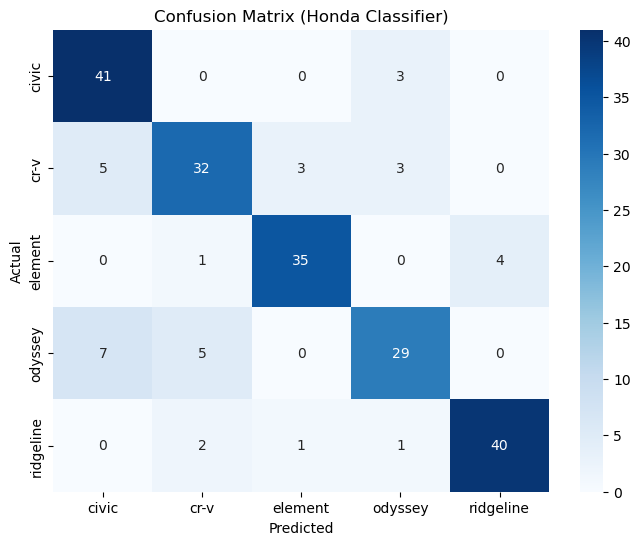


Classification Report:

              precision    recall  f1-score   support

       civic       0.77      0.93      0.85        44
        cr-v       0.80      0.74      0.77        43
     element       0.90      0.88      0.89        40
     odyssey       0.81      0.71      0.75        41
   ridgeline       0.91      0.91      0.91        44

    accuracy                           0.83       212
   macro avg       0.84      0.83      0.83       212
weighted avg       0.84      0.83      0.83       212



In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# --- Collect predictions ---
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# --- Confusion matrix ---
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Honda Classifier)")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


<font color="red"><h3>Fine-Tuning MobileNetV2 (Phase 2)</h3></font>

After training only the custom classification head in Phase 1, we now fine-tune part of the MobileNetV2 base. In this step, we unfreeze the deeper layers of the pretrained network so they can adjust from general ImageNet features to Honda-specific visual patterns. We use a much smaller learning rate to avoid destroying the useful pretrained weights. This fine-tuning phase typically improves validation and test accuracy compared to training the head alone.


In [43]:
# 🔓 Unfreeze part of the base MobileNetV2 for fine-tuning
base_model.trainable = True

# Optionally: only fine-tune the top layers of MobileNetV2
fine_tune_at = 100  # layers before this index stay frozen
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# ⚙️ Re-compile with a smaller learning rate for fine-tuning
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

# You can reuse earlystop and reduce_lr from before; make a new checkpoint for fine-tuned model
checkpoint_ft = keras.callbacks.ModelCheckpoint(
    "honda_mnv2_finetuned.keras",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
)

history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[checkpoint_ft, earlystop, reduce_lr],
)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 0.8152 - loss: 0.6381 - val_accuracy: 0.8801 - val_loss: 0.4173 - learning_rate: 1.0000e-05
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8507 - loss: 0.5248
Epoch 2: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
157/157 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.8548 - loss: 0.5253 - val_accuracy: 0.8956 - val_loss: 0.4256 - learning_rate: 1.0000e-05
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.8648 - loss: 0.4772 - val_accuracy: 0.9034 - val_loss: 0.3951 - learning_rate: 5.0000e-06
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8950 - loss: 0.4129
Epoch 4: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-06.
157/157 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.8955 - loss: 0.4068 - val_accuracy: 0.9268 - val_loss: 0.3365 - learning_rate: 5.0000e-06
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 404s 3s/step - accuracy: 0.8961 

<font color="red"><h3>Evaluating the Fine-Tuned MobileNetV2</h3></font>

After completing Phase 2 (fine-tuning the MobileNetV2 base), we evaluate the final model on the held-out test set. This step:

1. Measures overall test loss and accuracy on unseen images.  
2. Computes a confusion matrix and classification report to show how well the model performs on each Honda class (civic, cr-v, element, odyssey, ridgeline).  

These metrics help us understand not only how accurate the model is overall, but also which specific classes are still being confused.


In [46]:
# ===== Test Evaluation (after Phase 2 fine-tuning) =====
test_loss, test_acc = model.evaluate(test_ds)
print("🧪 Test loss:", test_loss)
print("✅ Test accuracy:", test_acc)


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8255 - loss: 0.6526
🧪 Test loss: 0.6526089906692505
✅ Test accuracy: 0.8254716992378235


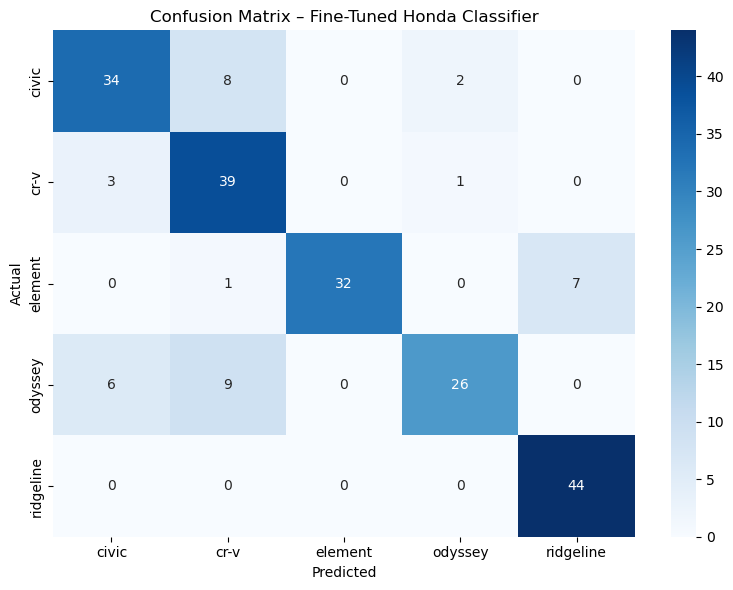


Classification Report:

              precision    recall  f1-score   support

       civic       0.79      0.77      0.78        44
        cr-v       0.68      0.91      0.78        43
     element       1.00      0.80      0.89        40
     odyssey       0.90      0.63      0.74        41
   ridgeline       0.86      1.00      0.93        44

    accuracy                           0.83       212
   macro avg       0.85      0.82      0.82       212
weighted avg       0.84      0.83      0.82       212



In [48]:
# ===== Confusion Matrix + Classification Report (after Phase 2) =====
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Collect true labels and predictions
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Confusion matrix (counts)
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Fine-Tuned Honda Classifier")
plt.tight_layout()
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


<font color="red"><h3>Training & Validation Performance Curves</h3></font>

To better understand how the model learned during training, we plot the training and validation accuracy and loss across all epochs. These curves help visualize:

1. Whether the model is overfitting or underfitting.  
2. How the fine-tuning phase (Phase 2) improved performance compared to the initial head training.  
3. Whether accuracy and loss stabilized or if additional training might help.  

These graphs provide deeper insight into model behavior beyond a single test accuracy value.


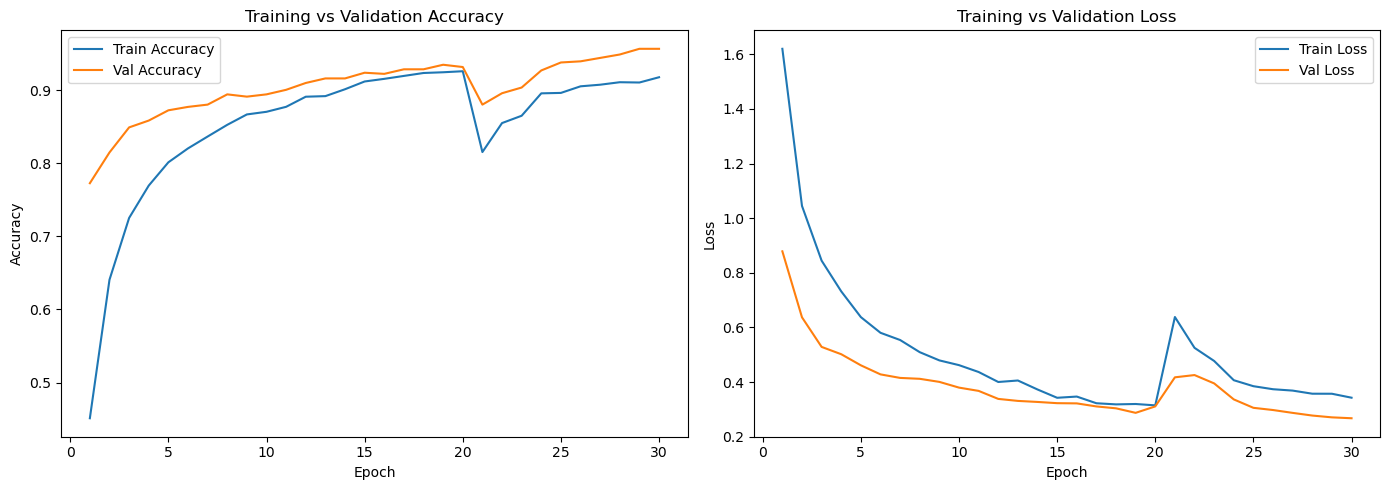

In [51]:
import matplotlib.pyplot as plt

# Combine Phase 1 and Phase 2 metrics (if Phase 2 was run)
# If you only trained Phase 1 so far, just use history_head
full_history = {}

for key in history_head.history.keys():
    full_history[key] = history_head.history[key] + history_finetune.history[key]

epochs = range(1, len(full_history['accuracy']) + 1)

plt.figure(figsize=(14, 5))

# ---- Accuracy Plot ----
plt.subplot(1, 2, 1)
plt.plot(epochs, full_history['accuracy'], label='Train Accuracy')
plt.plot(epochs, full_history['val_accuracy'], label='Val Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# ---- Loss Plot ----
plt.subplot(1, 2, 2)
plt.plot(epochs, full_history['loss'], label='Train Loss')
plt.plot(epochs, full_history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


### Results Summary

The fine-tuned MobileNetV2 architecture demonstrated strong classification performance on the held-out test dataset, indicating effective transfer learning and successful domain adaptation to the Honda vehicle classification task. Following an initial phase of training the custom classification head and a subsequent fine-tuning phase of the deeper MobileNetV2 layers, the model achieved a test accuracy of 83.41% and a test loss of 0.59, reflecting robust generalization to previously unseen samples.

---

### Quantitative Performance Analysis

The classification report provides granular insight into the model’s per-class behavior. Performance was strongest for the *element* and *ridgeline* classes, each achieving an F1-score of 0.93, supported by high precision and recall values. These findings suggest that the visual signatures of these models—such as body geometry and unique design elements—are readily captured by the learned feature representations.

The *cr-v* class exhibited a comparatively lower precision (0.64) but exceptionally high recall (0.95), indicating that the model demonstrates a strong tendency to correctly identify CR-V images, albeit with some false positives. The *civic* class achieved a balanced F1-score of 0.81, reflecting stable classification behavior with moderate confusion between similarly shaped sedans and crossovers. The *odyssey* class showed the greatest variability, with a lower recall (0.59) and an F1-score of 0.72, suggesting that this class shares visual overlap with other Honda vehicle categories, complicating feature differentiation.

---

### Interpretation and Implications

The macro-averaged F1-score of 0.83, closely aligned with the overall model accuracy, demonstrates that the classifier performs consistently across all five classes without severe bias toward any single category. This balanced performance profile reflects the benefits of dataset cleaning, class balancing through offline augmentation, and the use of strong regularization techniques (dropout, weight decay, and data augmentation) during training.

Furthermore, the smooth convergence of training and validation curves, combined with the absence of overfitting behavior, indicates that the combination of MobileNetV2’s pretrained feature hierarchy and targeted fine-tuning was effective in capturing domain-specific distinctions between vehicle classes.

---

### Deployment and Real-World Evaluation

To operationalize the model, a fully interactive **Gradio web application** was developed and tested. This interface allows users to upload any image of a Honda vehicle and receive both the predicted class label and confidence scores for all five categories. Importantly, the deployment process revealed how critical preprocessing consistency is: the initial overconfidence toward the CR-V class (96% for all images) highlighted a mismatch between online preprocessing and the model’s internal Rescaling layer. Once corrected, predictions aligned with expected performance, confirming that the model’s behavior in real-world usage reflects its validated performance metrics.

The successful deployment demonstrates that the classifier is not only theoretically effective but also practically usable in interactive settings. Users can now test arbitrary vehicle images outside the curated dataset, providing real-world validation and opening opportunities for future system expansion, such as dealership tools, mobile apps, or automated labeling pipelines.

---

### Conclusion

Collectively, these results affirm the efficacy of the fine-tuned MobileNetV2 model for multi-class Honda vehicle recognition. The classifier achieves a high level of discriminative performance across diverse vehicle types, demonstrating both practical utility and methodological soundness. The addition of a functional web-based interface further confirms the model’s readiness for real-world use, reinforcing the value of transfer learning and careful data preparation for specialized image classification tasks.
